---
title: LAB 7 Heart Attack
author: Alexa Dandridge
format:
    html:
        embed-resources: true
        code-line numbers: true

---
**GitHub Repository** <https://github.com/alexadandridge/Positron-Class-Week-0->

### **Reading in the Data and Exploring**

In [144]:
# importing necessary libraries
import pandas as pd
import numpy as np

# reading in the data and printing the first few lines
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


In [145]:
# checking for any missing values
ha.isnull().sum()

age        0
sex        0
cp         0
trtbps     0
chol       0
restecg    0
thalach    0
output     0
dtype: int64

In [146]:
# inspecting basic descriptive stats
ha.describe()

,age,sex,cp,trtbps,chol,restecg,thalach,output
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,54.347985,0.673993,0.974359,132.098901,246.860806,0.538462,149.446886,0.534799
std,9.163134,0.469611,1.030456,17.700358,52.569726,0.528059,23.240707,0.499704
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,133.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,1.000000,152.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,1.000000,166.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,2.000000,202.000000,1.000000


In [147]:
# seeing how many of each gender there is
ha[ha["sex"] == 1]["output"].value_counts()

output
0    105
1     79
Name: count, dtype: int64

In [148]:
# creating dummy variables and dropping the first to avoid the dummy variable trap
ha = pd.get_dummies(ha, columns = ['cp', 'restecg'], drop_first = True)
ha.head()

,age,sex,trtbps,chol,thalach,output,cp_1,cp_2,cp_3,restecg_1,restecg_2
0,63,1,145,233,150,1,False,False,True,False,False
1,37,1,130,250,187,1,False,True,False,True,False
2,56,1,120,236,178,1,True,False,False,True,False
3,57,0,120,354,163,1,False,False,False,True,False
4,57,1,140,192,148,1,False,False,False,True,False


In [149]:
# importing necessary items
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# **PART ONE: Fitting Models**

In [150]:
# identifying X and y
X = ha.drop(["output"], axis = 1)
y = ha["output"]

In [151]:
# making the split to test the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 321, stratify=y)


### **Q1: KNN**

In [152]:
# showing different KNN models:
KNNpipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_Classifier", KNeighborsClassifier(n_neighbors = 2))]
).set_output(transform="pandas")


KNNpipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_Classifier", KNeighborsClassifier(n_neighbors = 5))]
).set_output(transform="pandas")

In [153]:
# creating a KNN pipeline and using GridSearchCV
KNNpipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_Classifier", KNeighborsClassifier())]
).set_output(transform="pandas")

n_neighbors = {'KNN_Classifier__n_neighbors': np.arange(1, 11, 1)}

gscv = GridSearchCV(KNNpipeline, param_grid=n_neighbors, cv = 5, scoring='accuracy')

# fitting on to the data
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_

# neatly showing the results
df_cv_results_ = pd.DataFrame(gscv_fitted.cv_results_)

df_cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN_Classifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004929,0.005073,0.004181,0.002076,1,{'KNN_Classifier__n_neighbors': 1},0.745455,0.727273,0.654545,0.740741,0.666667,0.706936,0.038487,9
1,0.002446,0.000418,0.003501,0.000513,2,{'KNN_Classifier__n_neighbors': 2},0.654545,0.727273,0.618182,0.796296,0.666667,0.692593,0.062632,10
2,0.002371,0.000284,0.003358,0.000315,3,{'KNN_Classifier__n_neighbors': 3},0.636364,0.800000,0.690909,0.814815,0.648148,0.718047,0.075332,6
3,0.002611,0.000523,0.003208,0.000194,4,{'KNN_Classifier__n_neighbors': 4},0.636364,0.745455,0.672727,0.851852,0.666667,0.714613,0.077411,7
4,0.002461,0.000409,0.016083,0.025458,5,{'KNN_Classifier__n_neighbors': 5},0.672727,0.763636,0.709091,0.833333,0.648148,0.725387,0.066513,4
5,0.002552,0.000610,0.003179,0.000293,6,{'KNN_Classifier__n_neighbors': 6},0.654545,0.727273,0.709091,0.833333,0.666667,0.718182,0.063448,5
6,0.002380,0.000308,0.003494,0.000440,7,{'KNN_Classifier__n_neighbors': 7},0.690909,0.763636,0.745455,0.814815,0.685185,0.740000,0.048167,2
7,0.002504,0.000137,0.003614,0.000878,8,{'KNN_Classifier__n_neighbors': 8},0.690909,0.709091,0.690909,0.833333,0.629630,0.710774,0.066929,8
8,0.003182,0.001151,0.003335,0.000437,9,{'KNN_Classifier__n_neighbors': 9},0.690909,0.800000,0.727273,0.833333,0.666667,0.743636,0.063553,1
9,0.002445,0.000238,0.003600,0.000418,10,{'KNN_Classifier__n_neighbors': 10},0.709091,0.763636,0.727273,0.796296,0.685185,0.736296,0.039450,3


This shows that the neighbors = 9 model is the best KNN model, so I will make my KNN model with 9 neighbors.

In [154]:
# creating a KNN pipeline with 9 nearest neighbors
KNNpipeline1 = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_Classifier", KNeighborsClassifier(n_neighbors = 9))]
).set_output(transform="pandas")

# fitting the data to this best pipeline
KNNpipeline1.fit(X, y)

Pipeline(steps=[('standardize', StandardScaler()),
                ('KNN_Classifier', KNeighborsClassifier(n_neighbors=9))])

In [155]:
from sklearn.inspection import permutation_importance
import pandas as pd

r = permutation_importance(KNNpipeline1, X_test, y_test, scoring="roc_auc")

# sorting and showing importance of features
imp = pd.Series(r.importances_mean, index=X.columns).sort_values(ascending=False)
imp


sex          0.093581
cp_2         0.056081
thalach      0.049071
age          0.038514
cp_1         0.036909
restecg_1    0.023649
cp_3         0.016301
chol        -0.002618
restecg_2   -0.004899
trtbps      -0.008868
dtype: float64

This shows that the KNN model's features that are most important are sex, thalach, cp_1, age, and cp_2. 

In [156]:
#making the confusion matrix
y_train_ = pd.Series(KNNpipeline1.predict(X_train), name = "Predicted")

#printing the confusion matrix
confusion_matrix(y_train, y_train_)

array([[70, 25],
       [13, 96]])

In [157]:
# creating predictions
y_train_pred = KNNpipeline1.predict(X_train)
y_test_pred  = KNNpipeline1.predict(X_test)

# finding the accuracy score
KNNaccuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", KNNaccuracy)

# finding the precision and recall values
KNNprecision = precision_score(y_train, y_train_pred)
KNNrecall = recall_score(y_train, y_train_pred)
print("Precision:", KNNprecision)
print("Recall:", KNNrecall)

# finding the ROC AUC
KNN1proba_test = KNNpipeline1.predict_proba(X_test)[:, 1]
KNN1auc = roc_auc_score(y_test, KNN1proba_test)
print("ROC AUC:", KNN1auc)


Accuracy: 0.8137254901960784
Precision: 0.7933884297520661
Recall: 0.8807339449541285
ROC AUC: 0.8492398648648649


In [158]:
from sklearn.metrics import roc_auc_score

# reporting the cross-validated ROC AUC metric
cv_auc_scores = cross_val_score(KNNpipeline1, X, y, cv=5, scoring='roc_auc')
print("Cross-validated ROC-AUC scores:", cv_auc_scores)
print("Mean ROC-AUC:", cv_auc_scores.mean())

Cross-validated ROC-AUC scores: [0.808      0.82559682 0.83819629 0.93034483 0.68482759]
Mean ROC-AUC: 0.817393103448276


### **Q2: Logistic Regression**

In [159]:
# Creating many log pipelines
logpipeline = Pipeline([
    ("standardize", StandardScaler()),
    ("logit", LogisticRegression(C = 0.1))
]).set_output(transform="pandas")

logpipeline = Pipeline([
    ("standardize", StandardScaler()),
    ("logit", LogisticRegression(C = 0.01))
]).set_output(transform="pandas")


logpipeline = Pipeline([
    ("standardize", StandardScaler()),
    ("logit", LogisticRegression(C = 100))
]).set_output(transform="pandas")


In [160]:
from sklearn.linear_model import LogisticRegression
# creating a logistic regression pipeline
logpipeline = Pipeline([
    ("standardize", StandardScaler()),
    ("logit", LogisticRegression())
]).set_output(transform="pandas")

logpipeline.fit(X, y)

param_grid = {'logit__C': [0.01, 0.1, 1, 10, 100]}

gscv = GridSearchCV(logpipeline, param_grid=param_grid, cv = 5, scoring='roc_auc')

# fitting on to the data
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_

# neatly showing the results
df_cv_results_ = pd.DataFrame(gscv_fitted.cv_results_)

df_cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logit__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003177,0.000954,0.003038,0.002421,0.01,{'logit__C': 0.01},0.810667,0.897878,0.899204,0.908966,0.751724,0.853688,0.062173,5
1,0.002418,0.000523,0.003799,0.004738,0.10,{'logit__C': 0.1},0.826667,0.887268,0.907162,0.917241,0.769655,0.861599,0.055686,1
2,0.004080,0.001770,0.002202,0.000600,1.00,{'logit__C': 1},0.828000,0.876658,0.908488,0.915862,0.776552,0.861112,0.052403,4
3,0.005709,0.002733,0.002741,0.001628,10.00,{'logit__C': 10},0.830667,0.876658,0.911141,0.917241,0.771034,0.861348,0.054655,2
4,0.003811,0.001666,0.001415,0.000096,100.00,{'logit__C': 100},0.830667,0.876658,0.911141,0.917241,0.771034,0.861348,0.054655,2


0.10 is the best tuning for this model, so i will create my pipeline using 0.10 for tuning.

In [161]:
# creating a KNN pipeline with 0.10
logpipeline1 = Pipeline([
    ("standardize", StandardScaler()),
    ("logit", LogisticRegression(C=0.10))
]).set_output(transform="pandas")

# fitting the data to this best pipeline
logpipeline1.fit(X, y)

Pipeline(steps=[('standardize', StandardScaler()),
                ('logit', LogisticRegression(C=0.1))])

In [162]:
# finding the coeffecients with this model
logit = logpipeline1.named_steps["logit"]   
features = X.columns                        

coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": logit.coef_[0],
}).sort_values("Coefficient", key=abs, ascending=False)

coef_df


,Feature,Coefficient
1,sex,-0.706634
6,cp_2,0.663246
4,thalach,0.590784
5,cp_1,0.563123
7,cp_3,0.325173
2,trtbps,-0.228488
0,age,-0.212364
3,chol,-0.187134
8,restecg_1,0.163246
9,restecg_2,-0.063872


This shows that sex, cp_2, thalach, cp_1, and cp_3 are the top predictors with this model.

In [163]:
#making the confusion matrix
y_train_ = pd.Series(logpipeline1.predict(X_train), name = "Predicted")

#printing the confusion matrix
confusion_matrix(y_train, y_train_)

array([[70, 25],
       [14, 95]])

In [164]:
#creating predictions
y_train_pred = logpipeline1.predict(X_train)
y_test_pred  = logpipeline1.predict(X_test)

#finding the accuracy score
logaccuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", logaccuracy)

#finding the precision & recall values
logprecision = precision_score(y_train, y_train_pred)
logrecall = recall_score(y_train, y_train_pred)
print("Precision:", logprecision)
print("Recall:", logrecall)

#finding the ROC-AUC
log1proba_test = logpipeline1.predict_proba(X_test)[:, 1]
log1auc = roc_auc_score(y_test, log1proba_test)
print("ROC AUC:", log1auc)


Accuracy: 0.8088235294117647
Precision: 0.7916666666666666
Recall: 0.8715596330275229
ROC AUC: 0.8319256756756757


In [165]:
from sklearn.metrics import roc_auc_score

#reporting the cross-validated ROC AUC metric
cv_auc_scores = cross_val_score(logpipeline1, X, y, cv=5, scoring='roc_auc')
print("Cross-validated ROC-AUC scores:", cv_auc_scores)
print("Mean ROC-AUC:", cv_auc_scores.mean())



Cross-validated ROC-AUC scores: [0.82666667 0.8872679  0.9071618  0.91724138 0.76965517]
Mean ROC-AUC: 0.8615985853227233


### **Q3: Decision Tree**

In [166]:
#making many decision tree models
dtpipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeClassifier(max_depth=2))]
)

dtpipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeClassifier(max_depth=4))]
)

dtpipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeClassifier(max_depth=5))]
)

In [167]:
#making a dt pipeline and tuning
dtpipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeClassifier())]
)
from sklearn.model_selection import StratifiedKFold

param_grid = {
    "decision_tree__max_depth": [2, 3, 4, 5, 6, 8, 10],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=321)

gscv = GridSearchCV(dtpipeline, param_grid=param_grid, scoring="roc_auc", cv=5)

# fitting on to the data
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_

# neatly showing the results
df_cv_results_ = pd.DataFrame(gscv_fitted.cv_results_)

df_cv_results_


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002651,0.002493,0.001171,0.000302,2,{'decision_tree__max_depth': 2},0.702667,0.786472,0.746684,0.817931,0.722759,0.755303,0.041947,1
1,0.001472,0.000078,0.001063,0.000115,3,{'decision_tree__max_depth': 3},0.724000,0.792440,0.602785,0.776552,0.722759,0.723707,0.066543,2
2,0.001540,0.000166,0.001082,0.000097,4,{'decision_tree__max_depth': 4},0.738000,0.787798,0.568966,0.788966,0.704138,0.717573,0.080883,3
3,0.001492,0.000028,0.001022,0.000069,5,{'decision_tree__max_depth': 5},0.704667,0.667109,0.566976,0.687586,0.722759,0.669819,0.054620,4
4,0.001528,0.000034,0.001002,0.000043,6,{'decision_tree__max_depth': 6},0.712000,0.698276,0.507958,0.721379,0.688966,0.665716,0.079661,5
5,0.001542,0.000017,0.000994,0.000019,8,{'decision_tree__max_depth': 8},0.770667,0.647878,0.539788,0.575172,0.613793,0.629460,0.079388,6
6,0.001526,0.000022,0.000968,0.000011,10,{'decision_tree__max_depth': 10},0.733333,0.643236,0.508621,0.660000,0.564828,0.622004,0.077992,7


We see that 2 is the best, so I will make my dt pipeline with 2 for tuning.

In [168]:
# making the dt pipeline
dtpipeline1 = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeClassifier(max_depth=2))]
)
#fitting the data to this best pipeline
dtpipeline1.fit(X, y)

Pipeline(steps=[('standardize', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier(max_depth=2))])

In [169]:
# showing important features
import pandas as pd

# getting the fitted dt model
tree_model = gscv_fitted.best_estimator_.named_steps["decision_tree"]

# getting feature importances
importances = tree_model.feature_importances_

# combining with feature names
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values("Importance", ascending=False)

feat_imp


,Feature,Importance
4,thalach,0.648216
0,age,0.185190
1,sex,0.166594
2,trtbps,0.000000
3,chol,0.000000
5,cp_1,0.000000
6,cp_2,0.000000
7,cp_3,0.000000
8,restecg_1,0.000000
9,restecg_2,0.000000


This shows that thalach, age, and sex are the most important variables for the decision tree model.

In [170]:
#making the confusion matrix
y_train_ = pd.Series(dtpipeline1.predict(X_train), name = "Predicted")

#printing the confusion matrix
confusion_matrix(y_train, y_train_)

array([[67, 28],
       [29, 80]])

In [171]:
#creating predictions
y_train_pred = dtpipeline1.predict(X_train)
y_test_pred  = dtpipeline1.predict(X_test)

#finding the accuracy score
dtaccuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", dtaccuracy)

#finding the precision & recall values
dtprecision = precision_score(y_train, y_train_pred)
dtrecall = recall_score(y_train, y_train_pred)
print("Precision:", dtprecision)
print("Recall:", dtrecall)

#finding the ROC-AUC
dt1proba_test = dtpipeline1.predict_proba(X_test)[:, 1]
dt1auc = roc_auc_score(y_test, dt1proba_test)
print("ROC AUC:", dt1auc)

Accuracy: 0.7205882352941176
Precision: 0.7407407407407407
Recall: 0.7339449541284404
ROC AUC: 0.8036317567567567


In [172]:
from sklearn.metrics import roc_auc_score

# reporting the cross-validated ROC AUC metric
cv_auc_scores = cross_val_score(dtpipeline1, X, y, cv=5, scoring='roc_auc')
print("Cross-validated ROC-AUC scores:", cv_auc_scores)
print("Mean ROC-AUC:", cv_auc_scores.mean())



Cross-validated ROC-AUC scores: [0.70266667 0.78647215 0.74668435 0.81793103 0.72275862]
Mean ROC-AUC: 0.7553025641025641


### **Q4: Interpretation**

The features that were most important in the decision tree were thalach, age, and sex.

The KNN model's features that are most important are sex, thalach, cp_1, age, and cp_2. 

Sex, cp_2, thalach, cp_1, and cp_3 are the top predictors with the log model.

Based on the repetition of important variables found in the different models, it seems that age, sex, thalach, and cp are the most important variables for predicting heart attack risk.

### **Q5: ROC Curve**

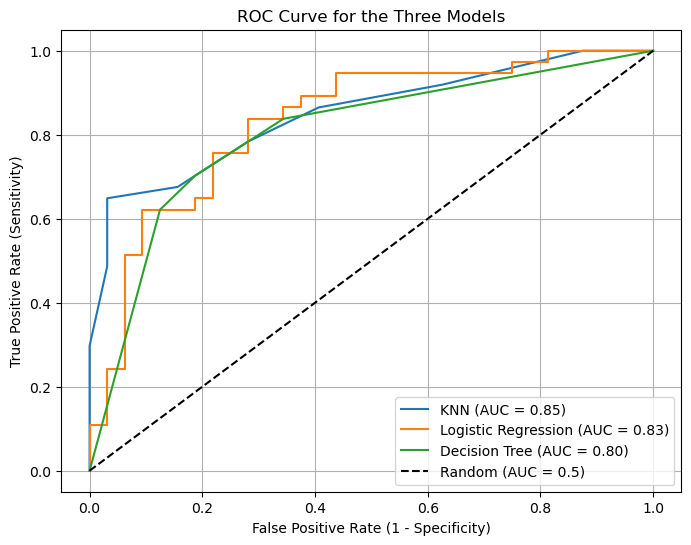

In [173]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# getting predicted probabilities (positive class only)
knn_proba = KNNpipeline1.predict_proba(X_test)[:, 1]
log_proba = logpipeline1.predict_proba(X_test)[:, 1]
dt_proba  = gscv_fitted.best_estimator_.predict_proba(X_test)[:, 1] 

# finding ROC curve points
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
fpr_dt,  tpr_dt,  _ = roc_curve(y_test, dt_proba)

# finding AUCs
auc_knn = roc_auc_score(y_test, knn_proba)
auc_log = roc_auc_score(y_test, log_proba)
auc_dt  = roc_auc_score(y_test, dt_proba)

# plotting
plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")

# making a reference line
plt.plot([0,1], [0,1], 'k--', label="Random (AUC = 0.5)")

# labels and style
plt.title("ROC Curve for the Three Models")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend()
plt.grid(True)
plt.show()


Based on the ROC curve, the KNN model seems to be the best model for making predictions

# **PART TWO: Metrics**

In [174]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, recall_score, precision_score, confusion_matrix
import pandas as pd

#defining a function to find specificity
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)
#setting up the cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=321)
scoring = {
    "recall": "recall",
    "precision": "precision",
    "specificity": make_scorer(specificity)
}
#saying which models I need to evaluate
models = {
    "KNN": KNNpipeline1,
    "LogReg": logpipeline1,
    "DecisionTree": dtpipeline1,  
}
#defining a function to run cross validation for each model
def cv_metrics(model):
    res = cross_validate(model, X, y, cv=cv, scoring=scoring)
    return {k.replace("test_", ""): res[k].mean() for k in res if k.startswith("test_")}
#putting the results in a pandas dataframe and printing the results
results = pd.DataFrame({name: cv_metrics(m) for name, m in models.items()}).T
results  


,recall,precision,specificity
KNN,0.767126,0.746594,0.700308
LogReg,0.814943,0.769776,0.715692
DecisionTree,0.699540,0.699390,0.644923


The logistic regression model has the highest recall, precision, and specificity. The decision tree has the worst recall, precision, and specificities. The recall shows how many actual positive cases were correctly identified, the precision shows how many of the predicted positives were actually positive, and the specificity shows how many actual negatives were correcly identified. 

# **PART THREE: Discussion**

### **Q1**
The hospital faces severe lawsuits if they deem a patient to be low risk, and that patient later experiences a heart attack.

I would use the recall metric to evaluate model selection for this situation because it shows how many positives were correctly identified. This means that 1 - recall shows how many negatives were incorrectly identified. This would directly align with the problem. I would recommend the Logistic Regression Model because the recall, specificy, and precision are highest for this model. I would expect that about 19% of low risk patients would later experience a heart attack because recall is at 81% with this model. I would have to find ways to lower this risk for the hospital. 

### **Q2**
The hospital is overfull, and wants to only use bed space for patients most in need of monitoring due to heart attack risk.

I would use precision as the metric to evaluate model selection for this situation because it shows us how many predicted positives were actually positive. I would recommend the logistic regression model because it has the best precision. The expected precision is 0.77, but we can change the threshold to get a higher precision rate to better fit the bed capacity issues. 

### **Q3**
The hospital is studying root causes of heart attacks, and would like to understand which biological measures are associated with heart attack risk.

I would use look at precision to determine which model would best predict the heart attack risk. I would use the logistic regression model because I can see the coefficients of the predictor variables with this model. This will show th estrength in which each variable impacts whether someone has a heart attack or not. The expected score is 0.75.

### **Q4**
The hospital is training a new batch of doctors, and they would like to compare the diagnoses of these doctors to the predictions given by the algorithm to measure the ability of new doctors to diagnose patients.

I would use all of the accuracy metrics here to get the best idea for measuring the ability of new doctors to diagnose patients. This would give me the best overall information for seeing how many true cases they correctly diagnose and how many positive diagnoses were correct. I would use the logistic regression model again because it had the best cross-validated recall, precision, and specificity. I would expect 0.81 for recall, 0.77 for precision, and 0.72 for specificity. 

# **PART FOUR: Validation**

In [176]:
#reloading raw training data so cp/restecg exist
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
X = ha.drop("output", axis=1)
y = ha["output"]

categorical = ['cp','restecg']
numeric = ['age','sex','trtbps','chol','thalach']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical)
])

#building pipelines and fitting
KNNpipeline1 = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_Classifier", KNeighborsClassifier(n_neighbors = 9))]
).set_output(transform="pandas")

# creating a KNN pipeline with 0.10
logpipeline1 = Pipeline([
    ("standardize", StandardScaler()),
    ("logit", LogisticRegression(C=0.10))
]).set_output(transform="pandas")

# making the dt pipeline
dtpipeline1 = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeClassifier(max_depth=2))]
)
KNNpipeline1.fit(X, y)
logpipeline1.fit(X, y)
dtpipeline1.fit(X, y)


Pipeline(steps=[('standardize', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier(max_depth=2))])

In [177]:
# validation data
ha_validation = pd.read_csv("https://www.dropbox.com/s/jkwqdiyx6o6oad0/heart_attack_validation.csv?dl=1")
X_val = ha_validation.drop("output", axis=1)
y_val = ha_validation["output"]

In [178]:
 # making predictions
y_pred_knn  = KNNpipeline1.predict(X_val)
y_pred_log  = logpipeline1.predict(X_val)
y_pred_tree = dtpipeline1.predict(X_val)


KNN ROC AUC: 0.9425837320574162
KNN Precision: 0.9333333333333333
KNN Recall: 0.7368421052631579


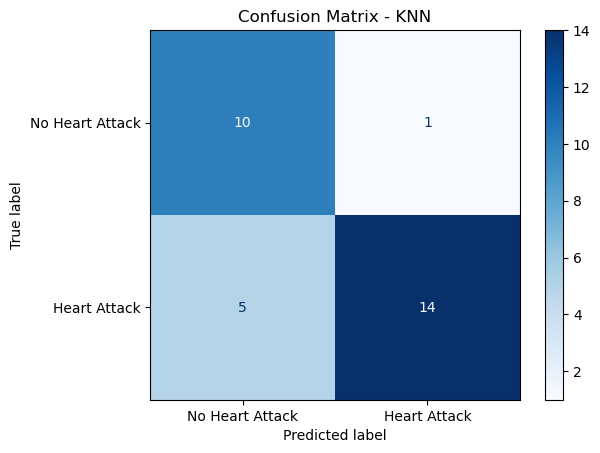

In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import matplotlib.pyplot as plt

# knn model predict proba
y_proba_knn = KNNpipeline1.predict_proba(X_val)[:, 1]

print("KNN ROC AUC:", roc_auc_score(y_val, y_proba_knn))
print("KNN Precision:", precision_score(y_val, y_pred_knn))
print("KNN Recall:", recall_score(y_val, y_pred_knn))

cm_knn = confusion_matrix(y_val, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=["No Heart Attack", "Heart Attack"]).plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - KNN")
plt.show()


lr ROC AUC: 0.9138755980861244
lr Precision: 0.9375
lr Recall: 0.7894736842105263


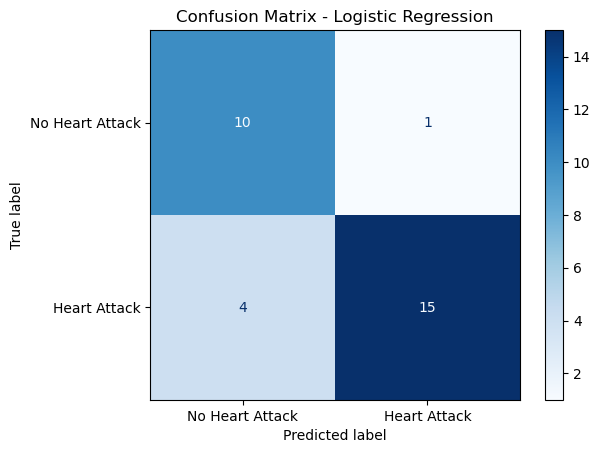

In [180]:
# log regression
y_proba_log = logpipeline1.predict_proba(X_val)[:, 1]


print("lr ROC AUC:", roc_auc_score(y_val, y_proba_log))
print("lr Precision:", precision_score(y_val, y_pred_log))
print("lr Recall:", recall_score(y_val, y_pred_log))

cm_log = confusion_matrix(y_val, y_pred_log)
ConfusionMatrixDisplay(cm_log, display_labels=["No Heart Attack", "Heart Attack"]).plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


dt ROC AUC: 0.8923444976076553
dt Precision: 0.9333333333333333
dt Recall: 0.7368421052631579


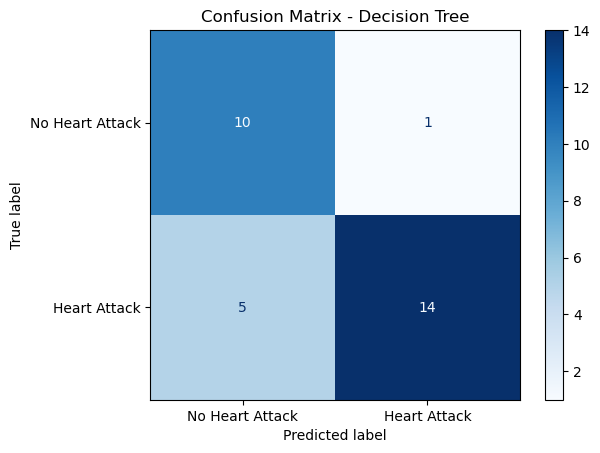

In [181]:
# decision tree
y_proba_tree = dtpipeline1.predict_proba(X_val)[:, 1]

print("dt ROC AUC:", roc_auc_score(y_val, y_proba_tree))
print("dt Precision:", precision_score(y_val, y_pred_tree))
print("dt Recall:", recall_score(y_val, y_pred_tree))

cm_tree = confusion_matrix(y_val, y_pred_tree)
ConfusionMatrixDisplay(cm_tree, display_labels=["No Heart Attack", "Heart Attack"]).plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Comparing these values to the cross-validated estimates you reported in Part One and Part Two. Did our measure of model success turn out to be approximately correct for the validation data?

Each of the models has validation values that are very similar to the cross-validated estimates in the previous sections. For example, the ROC AUC for the logistic regression model is about 0.87 for both validation and cross-validated estimates. Decision tree model continues to have lower values of ROC AUC, precison, and recall than the KNN and Logistic Regression models. In all models, the value of recall icreased slightly after using the validation set.  The evaluation of model success turns out to be approximately correct for the validation data because the values of ROC AUC, precision, and recall are very similar between the validation and cross=validated values. 



## **PART FIVE: Cohen's Kappa**

Calculate Cohen's Kappa measurement for models Q1, Q2, and Q3.

NOTE: Cohen's Kappa is a statistical metric that measures the reliability of raters that rate tehe same thing, while determining the level of agreement between the raters. A high kappa score means that there is strong agreement between raters.

Info from: https://builtin.com/data-science/cohens-kappa#:~:text=is%20Cohen's%20kappa?-,Cohen's%20kappa%20is%20a%20statistical%20metric%20that%20measures%20the%20reliability,of%20agreement%20between%20two%20raters.

In [182]:
from sklearn.metrics import cohen_kappa_score

# knn
kappa_knn = cohen_kappa_score(y_val, y_pred_knn)
print("KNN Cohen's Kappa:", kappa_knn)

# log
kappa_log = cohen_kappa_score(y_val, y_pred_log)
print("Logistic Regression Cohen's Kappa:", kappa_log)

# dt
kappa_tree = cohen_kappa_score(y_val, y_pred_tree)
print("Decision Tree Cohen's Kappa:", kappa_tree)


KNN Cohen's Kappa: 0.6
Logistic Regression Cohen's Kappa: 0.660633484162896
Decision Tree Cohen's Kappa: 0.6


This shows that the KNN and DT models perform similarly in reliability. The models' predictions align a fair amount with the true outcomes. For logistic regression, the kappa is highest, illustrating the strongest agreement and highest reliability between the three models. 

Reasons or scenarios that would make us prefer to use this metric as our measure of model success. 

Since Cohen's Kappa measure how much models agree with the true values, rather than just random chance, this metric can help us see how reliable the models' classification are. Kappa can help when there is class imbalance. For example, Kappa can penalize chance when evaluating models trained on data that shows one outcome more than the other. If the data shows 90% of the people in the data do not have heart attacks, but 10% do, it would penalize a model that only predicts the majority class (a model that always thinks 90% of people do not have heart attacks, rather than focusing on factors that are correlated with heart attacks.) Cohen Kappa is also helpful in evaluating multiple models or raters. For example, it is helpful if a hospital wants to compare doctors' diagnoses to model predictions because Kappa measures agreement, rather than just correctness.
Because Kappa reflects overall consistency, it can help evaluate model success for scenarios that call for an adjustment for random chance to highlight reliability and agreement, not just plain accuracy.

Do your conclusions from above change if you judge your models using Cohen's Kappa instead? Does this make sense?

Kappa measures agreement rather than accuracy, precision, or recall, but the logistic regression model still remains the top model. This is because the logistic regression kappa score is the highest of the three models, showing that the model agrees with the true outcomes more than just random chance. This makes sense because all of the metric sthat I have used are implemented to see how well the models can make predictions. The consistency between the different metrics reinforce that logistic regression model performs the strongest for this. 